In [1]:
import matplotlib.pyplot as plt
import numpy as np

import cmbo
from IPython.display import display

from plot_stacked import *
from score_individual_objects import *

%load_ext autoreload
%autoreload 2

/Users/rstiskalek/Projects/CMBOlympics/venv_cmbo/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
cfg = cmbo.utils.load_config("/Users/rstiskalek/Projects/CMBOlympics/scripts/config.toml")
data_MCXC = cmbo.io.load_mcxc_catalogue(cfg['paths']['MCXC_catalogue'])

Removing 94 MCXC entries with non-positive mass uncertainties.
Converted MCXC heliocentric redshifts to CMB frame.


In [3]:
logL = np.log10(data_MCXC["L500"] * 0.68)
elogL = data_MCXC["eL500"] / (data_MCXC["L500"] * np.log(10))


x_obs = cmbo.utils.radec_to_cartesian(data_MCXC['RA'], data_MCXC['DEC'])
x_obs *= cmbo.utils.cz_to_comoving_distance(data_MCXC['Z'] * cmbo.constants.SPEED_OF_LIGHT_KMS)[:, None]

mask = (data_MCXC['M500'] >= 1e14) & (data_MCXC['Z'] <= 0.05)
x_obs = x_obs[mask]
x_obs += 681.1 / 2


In [23]:
x_halo, masses = cmbo.io.load_halo_positions_masses(
    "/Users/rstiskalek/Projects/CMBOlympics/data/manticore_fof.hdf5",
    "Coordinates", "Group_M_Crit500", nsim=0, r_max=150, mass_min=1e14
    )


x_halo = x_obs + 0.1


In [24]:
groups = cmbo.match.fof_tessellation(x_obs, x_halo, linking_length=3)
groups_prob = cmbo.match.compute_group_probabilities(x_obs, x_halo, 1, groups)

In [25]:
# model = cmbo.match.AssociationModel(groups, groups_prob)

model = cmbo.match.ScalingRelationModel(groups, groups_prob, logL - 44, 0.01 * elogL, logL - 44 + 0.01)

In [26]:
mcmc = model.run()
mcmc.print_summary()
samples = mcmc.get_samples()

sample: 100%|██████████| 1500/1500 [00:02<00:00, 668.58it/s, 5 steps of size 3.42e-01. acc. prob=0.94]


                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      0.00      0.19     -0.00     -0.30      0.33    384.76      1.00
         b      1.01      0.31      1.01      0.46      1.52    767.58      1.00
   sigma_L      1.60      0.67      1.54      0.47      2.52    254.25      1.00

Number of divergences: 1


In [11]:
plt.figure()
plt.hist(samples['p_null'], bins=30)
plt.show()

KeyError: 'p_null'

<Figure size 350x262.5 with 0 Axes>

In [16]:
matches = model.get_best_matches(samples['p_null'])
matches

AttributeError: 'ScalingRelationModel' object has no attribute 'get_best_matches'

In [34]:
results = model.get_association_probabilities(samples['p_null'])

In [35]:
results

[{'obs_idx': array([30]),
  'halo_idx': array([112]),
  'probs': array([[0.00331509, 0.99668497]], dtype=float32)},
 {'obs_idx': array([ 0, 75]),
  'halo_idx': array([37]),
  'probs': array([[6.5934473e-11, 1.0000000e+00],
         [3.4065577e-01, 6.5934432e-01]], dtype=float32)},
 {'obs_idx': array([61]),
  'halo_idx': array([16, 42]),
  'probs': array([[1.0000002e-10, 1.0000002e-10, 1.0000000e+00]], dtype=float32)},
 {'obs_idx': array([74]),
  'halo_idx': array([98]),
  'probs': array([[4.1832672e-07, 9.9999994e-01]], dtype=float32)},
 {'obs_idx': array([25]),
  'halo_idx': array([31]),
  'probs': array([[5.669394e-08, 1.000000e+00]], dtype=float32)},
 {'obs_idx': array([37]),
  'halo_idx': array([3]),
  'probs': array([[0.12339094, 0.87660915]], dtype=float32)},
 {'obs_idx': array([32]),
  'halo_idx': array([20]),
  'probs': array([[0.40696552, 0.59303445]], dtype=float32)},
 {'obs_idx': array([57]),
  'halo_idx': array([134]),
  'probs': array([[4.8234174e-08, 1.0000000e+00]], dtyp

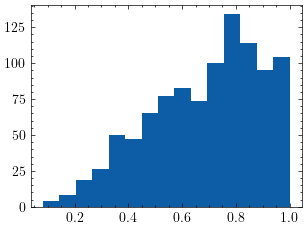

In [34]:
plt.figure()
plt.hist(samples["p_null"], bins="auto")
plt.show()

In [6]:
# total = 0
# for obs_idx, halo_idx in groups:
#     n_assignments = len(cmbo.match.generate_valid_assignments(len(obs_idx), len(halo_idx)))
#     total += n_assignments
#     print(f"Group ({len(obs_idx)} obs, {len(halo_idx)} halos): {n_assignments} assignments")

# print(f"Total assignments: {total}")


In [32]:
res[1]

Array([[0.42000607],
       [0.98117006]], dtype=float32)

In [34]:
groups[1]

(array([ 0, 75]), array([37]))

In [19]:
sum([len(gr[1]) for gr in groups])

45

In [20]:
len(x_halo)

135

In [16]:
len(x_obs)

76

In [11]:
groups[0]

(array([30]), array([112]))